In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-11 04:11:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c09::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  97.7MB/s    in 0.7s    

2020-07-11 04:11:27 (97.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile
local_zip="/tmp/cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [6]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['cats', 'dogs']

In [7]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))

1000
1000


In [8]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
#training with cat images
train_cat=os.path.join(train_dir,'cats')
train_dog=os.path.join(train_dir,'dogs')
validation_cat=os.path.join(validation_dir,'cats')
validation_dog=os.path.join(validation_dir,'dogs')

In [9]:
# File name
file_name_dir=os.listdir(train_cat)
file_name_dir[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

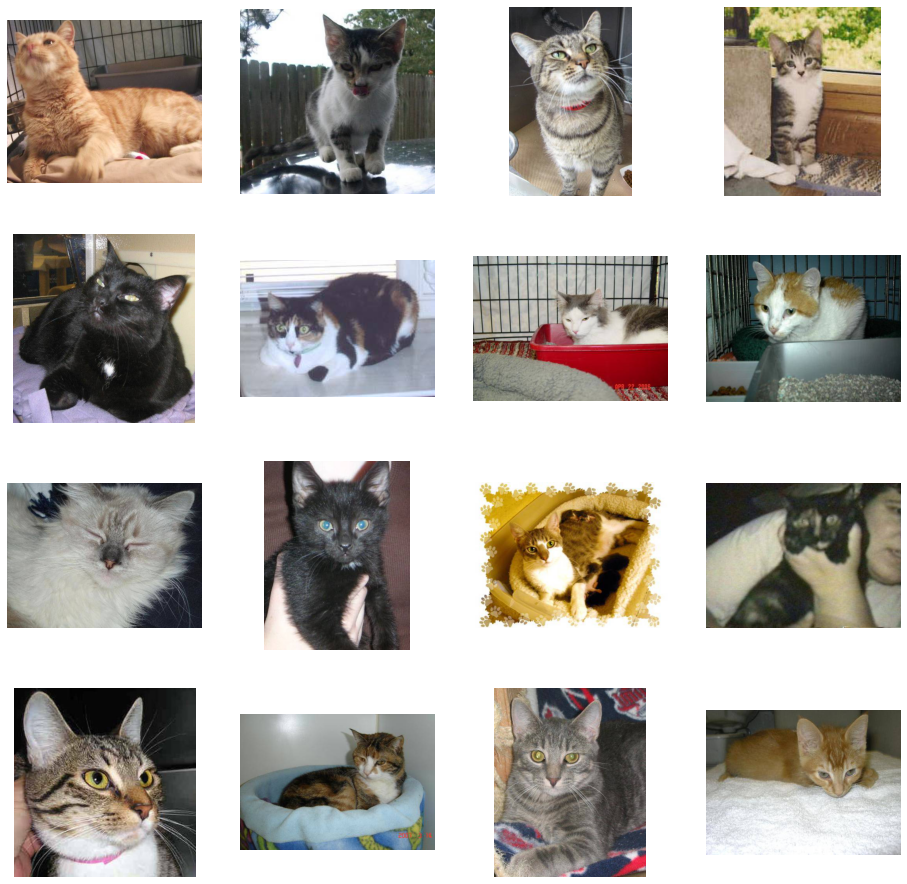

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1
for i in range(16):
  img=plt.imread(os.path.join(train_cat,file_name_dir[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')

  j+=1

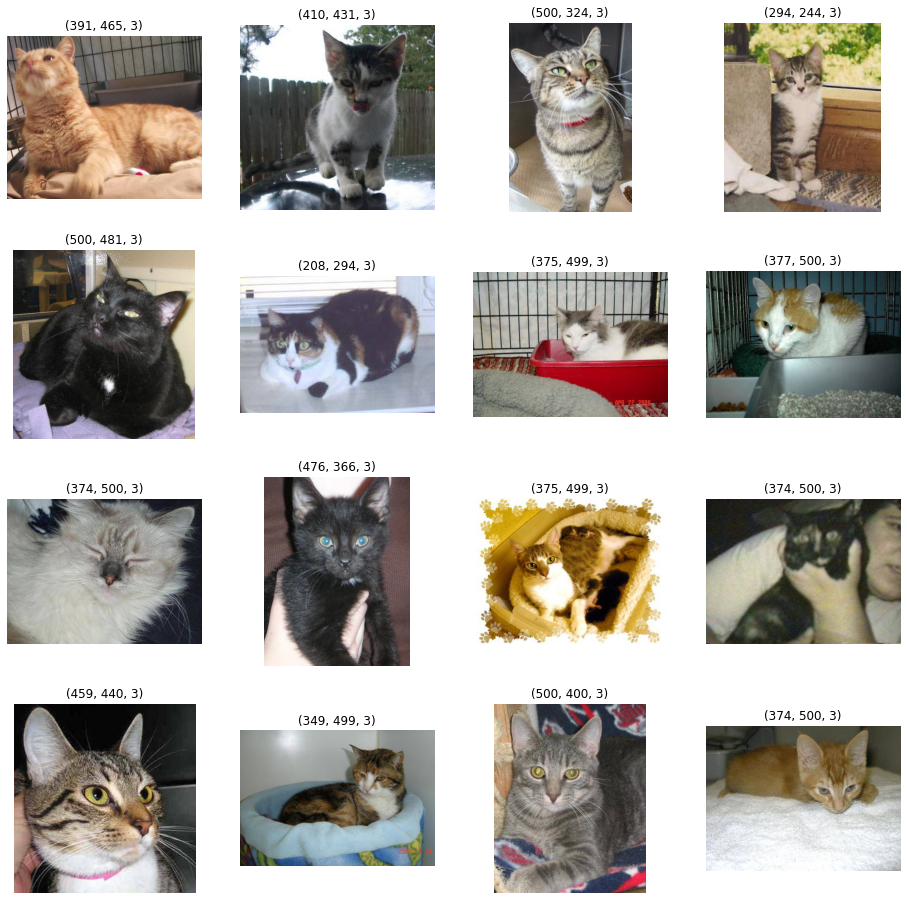

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1
for i in range(16):
  img=plt.imread(os.path.join(train_cat,file_name_dir[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')

  j+=1

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
train_generator

(20, 150, 150, 3)
(20,)


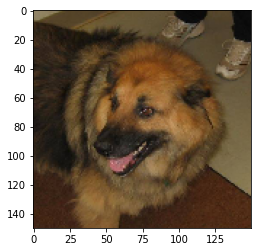

In [14]:
imgs,labels=train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

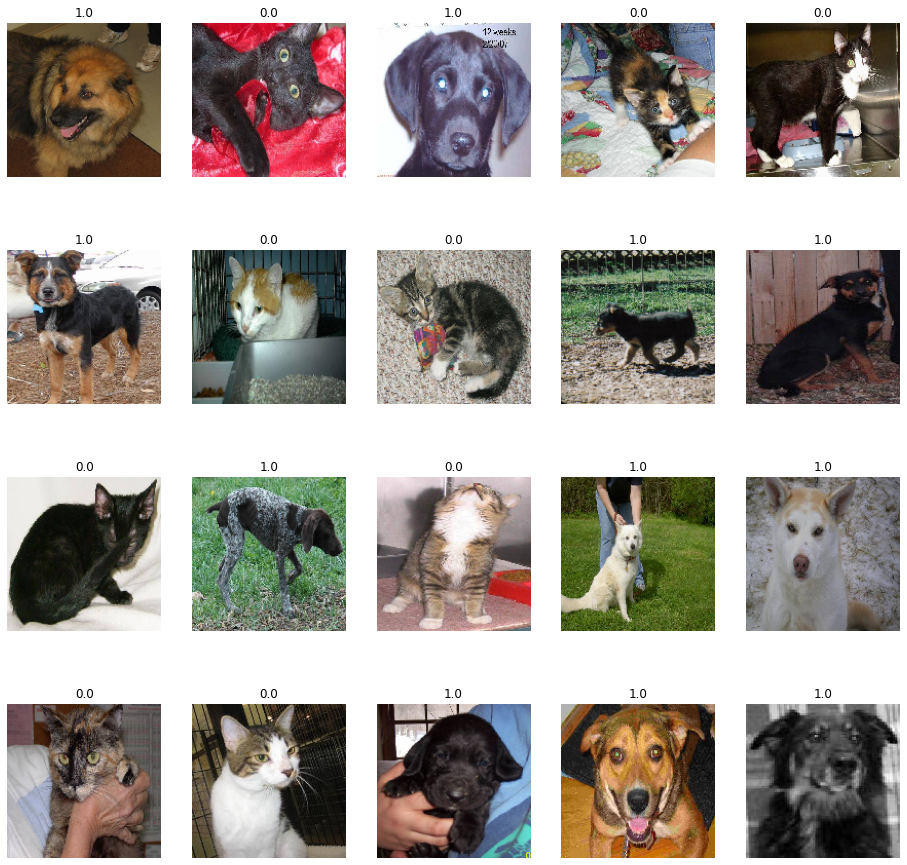

In [17]:
plt.figure(figsize=(16,16))
pos=1
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])
  plt.axis('off')
  pos+=1
  #here for dog image we get 1 as title and for cat image we get o as title indicating binary representation

Build the Model


In [19]:
#import required 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [20]:
model=Sequential()
#add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#convert featuremap to 1D array
model.add(Flatten())
#Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
#Final output layer
model.add(Dense(1,activation='sigmoid'))
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4624)              0

In [23]:
#compiling model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
# fit
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 9s 86ms/step - loss: 0.6946 - accuracy: 0.5745 - val_loss: 0.6314 - val_accuracy: 0.6510
Epoch 2/15
100/100 [==============================] - 8s 85ms/step - loss: 0.5802 - accuracy: 0.6955 - val_loss: 0.6054 - val_accuracy: 0.6620
Epoch 3/15
100/100 [==============================] - 8s 85ms/step - loss: 0.5215 - accuracy: 0.7535 - val_loss: 0.6724 - val_accuracy: 0.6380
Epoch 4/15
100/100 [==============================] - 9s 85ms/step - loss: 0.4325 - accuracy: 0.7935 - val_loss: 0.6698 - val_accuracy: 0.6900
Epoch 5/15
100/100 [==============================] - 9s 86ms/step - loss: 0.3732 - accuracy: 0.8305 - val_loss: 0.7705 - val_accuracy: 0.6610
Epoch 6/15
100/100 [==============================] - 9s 85ms/step - loss: 0.2942 - accuracy: 0.8675 - val_loss: 0.7655 - val_accuracy: 0.6910
Epoch 7/15
100/100 [==============================] - 9s 85ms/step - loss: 0.2396 - accuracy: 0.9050 - val_loss: 0.7782 - val_accuracy: 0.7030

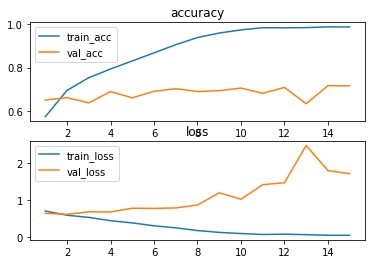

In [25]:
train_accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epoches=list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epoches,train_accuracy,label='train_acc')
plt.plot(epoches,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epoches,train_loss,label='train_loss')
plt.plot(epoches,val_loss,label='val_loss')
plt.title('loss')
plt.legend()


In [26]:
# to predict an image
# 1.Read the image
# 2. Shape of image
#
# 4.Apply scaling

In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np
img=image.load_img('/tmp/download.jpg')
print(type(img))
img=tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img=tf.image.resize(img,(150,150))
img=img/255
print(img.shape)
img=np.expand_dims(img,axis=0)
print(img.shape)



<class 'PIL.JpegImagePlugin.JpegImageFile'>
(168, 300, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [39]:

model.predict(img)

array([[0.9881215]], dtype=float32)